In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import estimate_bandwidth
from PIL import Image

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [116]:
im = mpimg.imread('hitam7.jpg')
im_gray = rgb2gray(im)

In [117]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = 0
    final_value = 0
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2
        

        #print("Wb", Wb, "Wf", Wf)
        #print("t", t, "value", value)
        
    if value > final_value:
        final_thresh = t
        final_value = value
    
    return final_value,final_value*0.5
            #for hi    for lo

def threshold(img, lo = 30, hi=130):
    strong = img > hi
    weak = img< lo
    return strong, weak


def ntah (img):
    low_ratio = 0.2
    count = 0
    for x in img:
        for y in x:
            count = count + y
    m,n = img.shape
    hi = count /(m*n)
    return hi,hi*low_ratio

In [118]:
# ntahlah ,,, gw pengen ambil pixel yang warnanya mirip grayscele aja , supaya warna biru,merah,etc ilang

def search_pixels_close_to_grayScale(image):
    img = image.copy()
    m,n,x = img.shape
    zero = np.zeros((m,n))
    tolerir = 20
    for x in range(len(zero)):
        for y in range(len(zero[0])):
            
            if (abs(image[x,y,1] - image[x,y,2] )<= tolerir) or (abs(image[x,y,0] - image[x,y,2] )<= tolerir) or (abs(image[x,y,1] - image[x,y,0] )<= tolerir):
                zero[x][y] = 1
    for x in range(len(zero)):
        for y in range(len(zero[0])):
            if not zero[x,y]:
                img[x][y] = 255
    return img
    

In [119]:
"""
neargrey = search_pixels_close_to_grayScale(im)
plt.figure(0)
plt.imshow(neargrey,cmap = 'gray')
plt.show()
plt.figure(1)
plt.imshow(im,cmap = 'gray')
plt.show()
"""

"\nneargrey = search_pixels_close_to_grayScale(im)\nplt.figure(0)\nplt.imshow(neargrey,cmap = 'gray')\nplt.show()\nplt.figure(1)\nplt.imshow(im,cmap = 'gray')\nplt.show()\n"

In [159]:
def level_thresHold(image ,level = 17):
    dst = np.zeros(shape=(5,2))
    image = np.array(image)
    
    high = 255
    diff = int(high//level)
    
    while 1:
        low = high - diff if (high - diff) >=0 else 0 
        to_low = np.array([low])
        to_high = np.array([high])
        mask = cv2.inRange(image,to_low,to_high)
        image[mask>0] = high
        high -= diff
        
        if low<= 0:
            break
    #print(image)
    return Image.fromarray(image)
def b_th(image,step = 2):
    count = 0
    image = np.array(image)
    for x in range(len(image)):
        for y in range(len(image[0])):
            if image[x,y]<=step:
                count = count+1
    return count
    
    
def multy_th(image,minus = 4):
    lst = []
    img = image.copy()
    level = 0
    
    while level <255:
        #img = level_thresHold(img ,level )
        level = int(level +5)
        lst.append(b_th(img,level))
    #img = level_thresHold(img ,level )
    print (lst)
    return img

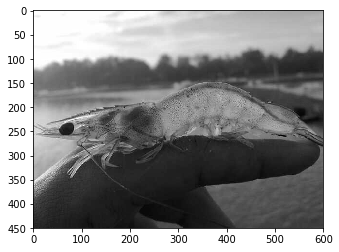

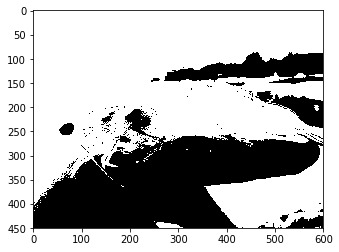

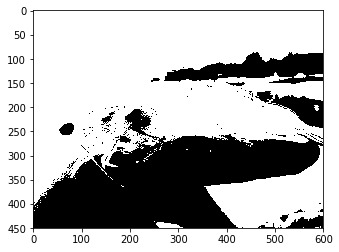

In [171]:

#low = estimate_bandwidth(X, quantile=0.1, n_samples=100)
#hi,lo = otsu(im_gray)
#print (hi)
#print (low)
#mth = multy_th(im_gray)
#s,w = threshold(im_gray,lo,hi)
mth = level_thresHold(im_gray ,level = 4)
mth = level_thresHold(mth ,level = 2)
#s,mth = threshold(im_gray,60,100)
mth = np.where(mth > np.min(mth),255,mth)
plt.figure(13)
plt.imshow(im_gray,cmap = 'gray')
plt.show()
plt.figure(11)
plt.imshow(mth,cmap = 'gray')
plt.show()
plt.figure(12)
plt.imshow(mth,cmap = 'gray')
plt.show()

In [152]:
"""
m,n = im_gray.shape
result = np.zeros((m,n,3))
result[:,:,0] = s
result[:,:,1] = (s + w) > 0
result[:,:,2] = w
plt.figure(figsize=(7,7)).add_subplot(111, title='blue is desease').imshow(result,cmap='gray')
plt.figure(0)
plt.imshow(im,cmap = 'gray')
plt.show()
"""

"\nm,n = im_gray.shape\nresult = np.zeros((m,n,3))\nresult[:,:,0] = s\nresult[:,:,1] = (s + w) > 0\nresult[:,:,2] = w\nplt.figure(figsize=(7,7)).add_subplot(111, title='blue is desease').imshow(result,cmap='gray')\nplt.figure(0)\nplt.imshow(im,cmap = 'gray')\nplt.show()\n"